In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [36]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Kara = pd.read_excel(filepath, sheet_name='Kara-Extent-km^2')

In [37]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [38]:
fp.month_mapping(Kara)
fp.date_time(Kara)

,Extent,Date
0,917992.880,1979-01-01
1,917992.880,1979-02-01
2,917992.880,1979-03-01
3,917992.880,1979-04-01
4,917992.880,1979-05-01
...,...,...
533,728642.743,2023-06-01
534,437024.646,2023-07-01
535,202260.789,2023-08-01
536,98103.856,2023-09-01


In [39]:
scaler = MinMaxScaler()
Kara['Extent'] = scaler.fit_transform(Kara['Extent'].values.reshape(-1, 1))

In [40]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [41]:
extent = Kara['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((525, 12, 1), (525,))

In [42]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [43]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [44]:
cp = ModelCheckpoint('Kara_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [45]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
42/53 [======================>.......] - ETA: 0s - loss: 0.6715 - root_mean_squared_error: 0.8194

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 6s 75ms/step - loss: 0.6586 - root_mean_squared_error: 0.8115 - val_loss: 0.5178 - val_root_mean_squared_error: 0.7196
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.5957 - root_mean_squared_error: 0.7718

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.5876 - root_mean_squared_error: 0.7665 - val_loss: 0.4618 - val_root_mean_squared_error: 0.6796
Epoch 3/50
48/53 [==========================>...] - ETA: 0s - loss: 0.5247 - root_mean_squared_error: 0.7243

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.5184 - root_mean_squared_error: 0.7200 - val_loss: 0.4089 - val_root_mean_squared_error: 0.6395
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.4539 - root_mean_squared_error: 0.6737

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.4551 - root_mean_squared_error: 0.6746 - val_loss: 0.3542 - val_root_mean_squared_error: 0.5952
Epoch 5/50
51/53 [===========================>..] - ETA: 0s - loss: 0.3964 - root_mean_squared_error: 0.6296

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.3980 - root_mean_squared_error: 0.6309 - val_loss: 0.3099 - val_root_mean_squared_error: 0.5567
Epoch 6/50
49/53 [==========================>...] - ETA: 0s - loss: 0.3339 - root_mean_squared_error: 0.5778

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 52ms/step - loss: 0.3374 - root_mean_squared_error: 0.5809 - val_loss: 0.2609 - val_root_mean_squared_error: 0.5108
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2883 - root_mean_squared_error: 0.5369

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.2881 - root_mean_squared_error: 0.5367 - val_loss: 0.2236 - val_root_mean_squared_error: 0.4728
Epoch 8/50
40/53 [=====================>........] - ETA: 0s - loss: 0.2423 - root_mean_squared_error: 0.4922

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.2443 - root_mean_squared_error: 0.4943 - val_loss: 0.1870 - val_root_mean_squared_error: 0.4325
Epoch 9/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1962 - root_mean_squared_error: 0.4430

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.1948 - root_mean_squared_error: 0.4414 - val_loss: 0.1755 - val_root_mean_squared_error: 0.4190
Epoch 10/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1670 - root_mean_squared_error: 0.4086

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.1634 - root_mean_squared_error: 0.4042 - val_loss: 0.1402 - val_root_mean_squared_error: 0.3744
Epoch 11/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1278 - root_mean_squared_error: 0.3575

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.1287 - root_mean_squared_error: 0.3588 - val_loss: 0.1244 - val_root_mean_squared_error: 0.3527
Epoch 12/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1039 - root_mean_squared_error: 0.3223

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.1047 - root_mean_squared_error: 0.3235 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2941
Epoch 13/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0801 - root_mean_squared_error: 0.2831

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0808 - root_mean_squared_error: 0.2843 - val_loss: 0.0667 - val_root_mean_squared_error: 0.2582
Epoch 14/50
52/53 [============================>.] - ETA: 0s - loss: 0.0657 - root_mean_squared_error: 0.2563

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.0656 - root_mean_squared_error: 0.2562 - val_loss: 0.0495 - val_root_mean_squared_error: 0.2224
Epoch 15/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0571 - root_mean_squared_error: 0.2390

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 50ms/step - loss: 0.0554 - root_mean_squared_error: 0.2353 - val_loss: 0.0376 - val_root_mean_squared_error: 0.1940
Epoch 16/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0478 - root_mean_squared_error: 0.2187

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.0459 - root_mean_squared_error: 0.2143 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1701
Epoch 17/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0443 - root_mean_squared_error: 0.2104 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1758
Epoch 18/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0339 - root_mean_squared_error: 0.1842

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0352 - root_mean_squared_error: 0.1876 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1500
Epoch 19/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0318 - root_mean_squared_error: 0.1782 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1704
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0323 - root_mean_squared_error: 0.1798 - val_loss: 0.0374 - val_root_mean_squared_error: 0.1933
Epoch 21/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0302 - root_mean_squared_error: 0.1737 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1972
Epoch 22/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0258 - root_mean_squared_error: 0.1605

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 54ms/step - loss: 0.0255 - root_mean_squared_error: 0.1598 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1381
Epoch 23/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0264 - root_mean_squared_error: 0.1624 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1906
Epoch 24/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0236 - root_mean_squared_error: 0.1536 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1654
Epoch 25/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0248 - root_mean_squared_error: 0.1575 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1695
Epoch 26/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0275 - root_mean_squared_error: 0.1658 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1490
Epoch 27/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0257 - root_mean_squared_error: 0.1602 - val_loss: 0.0540 - val_root_mean_squared

INFO:tensorflow:Assets written to: Kara_model_LT2\assets


INFO:tensorflow:Assets written to: Kara_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0255 - root_mean_squared_error: 0.1596 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1322
Epoch 38/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0239 - root_mean_squared_error: 0.1547 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374
Epoch 39/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0195 - root_mean_squared_error: 0.1397 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1642
Epoch 40/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0218 - root_mean_squared_error: 0.1478 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734
Epoch 41/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0228 - root_mean_squared_error: 0.1510 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1617
Epoch 42/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0238 - root_mean_squared_error: 0.1544 - val_loss: 0.0222 - val_root_mean_squared

In [46]:
time = (etime - stime)/60
print(f'{time} minutes')

1.1701456348101298 minutes


In [47]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

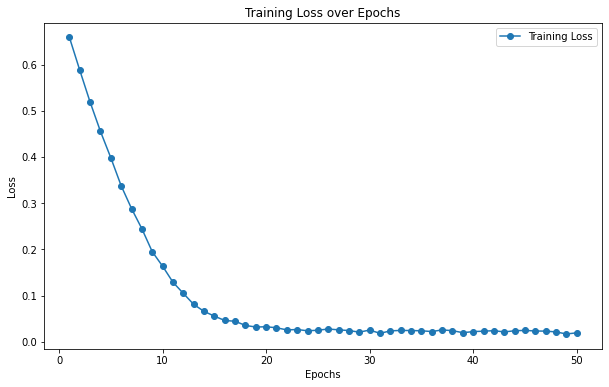

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

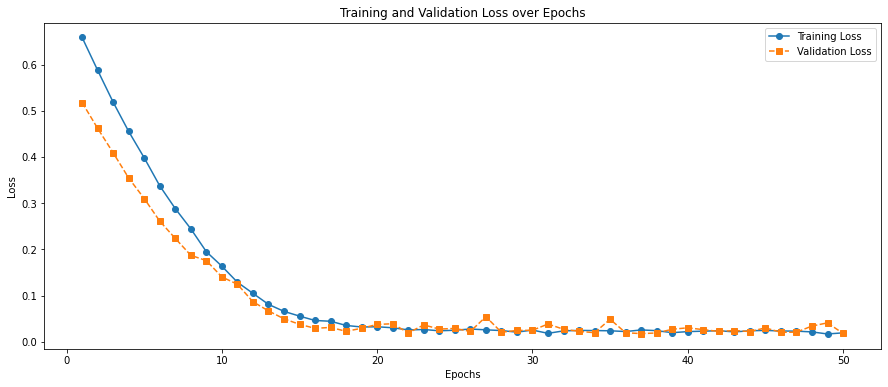

In [49]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [50]:
from tensorflow.keras.models import load_model
model1 = load_model('Kara_model_LT2/')

In [51]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 11ms/step


In [52]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.13437424322901098
MAE : 0.10224160436995301


In [53]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [54]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,765037.812500,763496.585
1,433535.906250,282691.615
2,139419.937500,71897.386
3,-2187.126465,60592.380
4,233429.203125,131973.043
5,490083.125000,753595.099
6,698031.812500,909176.475
7,864487.625000,917006.278
8,848428.250000,906368.363
9,920344.937500,917403.622


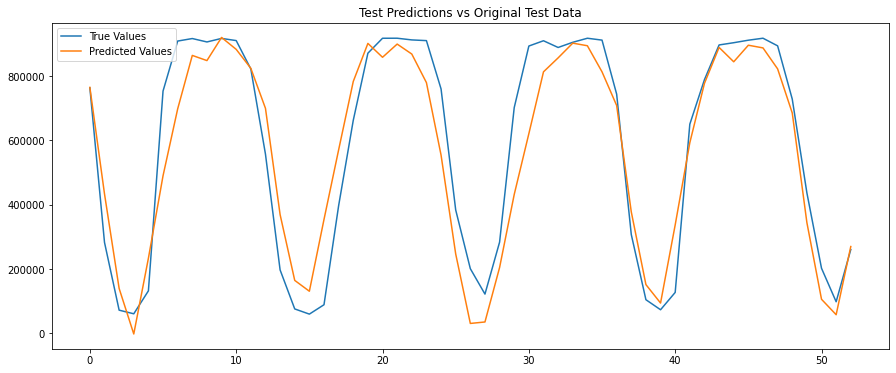

In [55]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [56]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [57]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

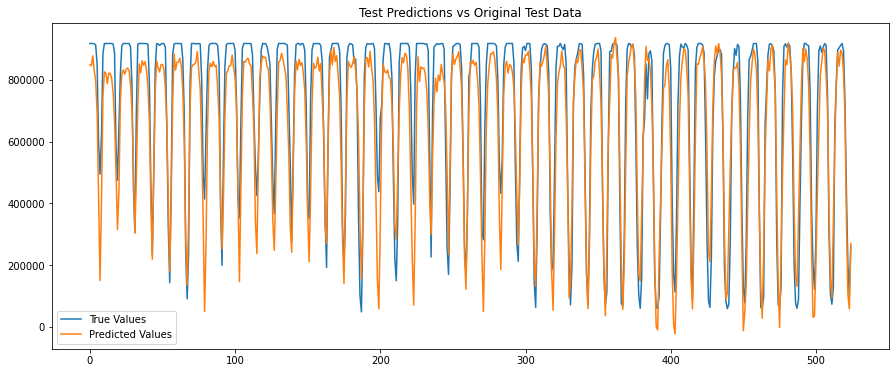

In [58]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()